Work with the deepstack face API. 

In [1]:
!pip install deepstack-python

  Created wheel for deepstack-python: filename=deepstack_python-0.6-py3-none-any.whl size=4752 sha256=395dc84fd71708ffc0d7cf5fb62f558721117bb01d9db587b97d8a411fc17c3a
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/02/c2/04c4ac2fee3bbd30686aa77a3872b7b3a3329be00d1b6cb9b0
Successfully built deepstack-python


In [2]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
IP_ADDRESS = '192.168.1.133'
PORT = '5000'
API_KEY = ""
TIMEOUT = 30 # Default is 10

## Face API

In [4]:
dsface = ds.DeepstackFace(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

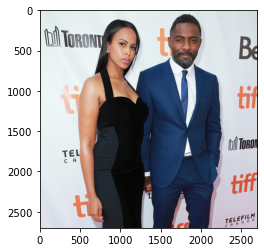

In [6]:
image_path = 'couple.jpg'

plt.imshow(Image.open(image_path));

## Face detection
Detect faces, but do not recognise them, quite fast.

In [7]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        dsface.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 12.4 ms, sys: 4.8 ms, total: 17.2 ms
Wall time: 2.09 s


Access the predictions

In [8]:
dsface.predictions

[{'confidence': 0.99997544,
  'y_min': 154,
  'x_min': 1615,
  'y_max': 682,
  'x_max': 1983},
 {'confidence': 0.9999571,
  'y_min': 237,
  'x_min': 869,
  'y_max': 732,
  'x_max': 1214}]

In [20]:
len(dsface.predictions)

2

## Register a face
Post a name and a close up photo of a face

In [9]:
%%time
try:
    with open('idris.jpg', "rb") as image_bytes:
        dsface.register_face("idris", image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 5.86 ms, sys: 4.85 ms, total: 10.7 ms
Wall time: 4.6 s


## Face recognition
Recoginition will match any faces that have been taught. This is slower than face detection

In [10]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        dsface.recognise(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 16.4 ms, sys: 13 ms, total: 29.5 ms
Wall time: 10 s


## Helper functions
The package provides helper functions for extracting info out of deepstack predictions.

Get recognised faces and their probability (%)

In [23]:
ds.get_recognised_faces(dsface.predictions)

{'Idris Elba': 74.7}